<a href="https://colab.research.google.com/github/yuvi31102000/Loan_default/blob/main/Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cur_app = pd.read_csv("/content/drive/MyDrive/application_data.csv")

In [7]:
cur_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
pre_app = pd.read_csv("/content/drive/MyDrive/previous_application.csv")
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(f'Current application size: {cur_app.shape}')
print(f'Previous application size: {pre_app.shape}')

Current application size: (307511, 122)
Previous application size: (1670214, 37)


In [10]:
df_cur_app = cur_app.copy()
df_pre_app = pre_app.copy()

In [12]:
df_cur_app.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [13]:
df_cur_app_nulls = pd.DataFrame(df_cur_app.isnull().sum().sort_values(ascending=False))

In [14]:
df_cur_app_nulls.reset_index(inplace=True)

In [15]:
df_cur_app_nulls.rename(columns={'index': 'column_name', 0: 'null_count'}, inplace=True)

In [17]:
df_cur_app_nulls.to_excel('cur_app_nulls.xlsx', index=False)

In [18]:
pd.read_excel('cur_app_nulls.xlsx')

,column_name,null_count
0,COMMONAREA_AVG,214865
1,COMMONAREA_MODE,214865
2,COMMONAREA_MEDI,214865
3,NONLIVINGAPARTMENTS_MEDI,213514
4,NONLIVINGAPARTMENTS_MODE,213514
5,NONLIVINGAPARTMENTS_AVG,213514
6,FONDKAPREMONT_MODE,210295
7,LIVINGAPARTMENTS_AVG,210199
8,LIVINGAPARTMENTS_MEDI,210199
9,LIVINGAPARTMENTS_MODE,210199


In [24]:
df_cur_app_nulls['percentage'] = round(df_cur_app_nulls['null_count'] / df_cur_app.shape[0] * 100, 2)

In [25]:
df_cur_app_nulls.to_excel('cur_app_nulls.xlsx', index=False)

In [26]:
df_cur_app_nulls[df_cur_app_nulls['percentage'] > 40][['column_name', 'percentage']]

,column_name,percentage
0,COMMONAREA_AVG,69.87
1,COMMONAREA_MODE,69.87
2,COMMONAREA_MEDI,69.87
3,NONLIVINGAPARTMENTS_MEDI,69.43
4,NONLIVINGAPARTMENTS_MODE,69.43
5,NONLIVINGAPARTMENTS_AVG,69.43
6,FONDKAPREMONT_MODE,68.39
7,LIVINGAPARTMENTS_AVG,68.35
8,LIVINGAPARTMENTS_MEDI,68.35
9,LIVINGAPARTMENTS_MODE,68.35


In [27]:
df_col_info = pd.read_csv('/content/drive/MyDrive/columns_description.csv')

In [28]:
cur_app_null_info = pd.merge(left=df_cur_app_nulls, right=df_col_info, how='inner', left_on='column_name', right_on='Row')[['column_name', 'percentage', 'Description']]

In [29]:
cur_app_null_info.to_excel('cur_app_null_info.xlsx', index=False)

In [41]:
cur_app_null_info[cur_app_null_info['percentage'] > 40]

,column_name,percentage,Description
0,COMMONAREA_AVG,69.87,Normalized information about building where th...
1,COMMONAREA_MODE,69.87,Normalized information about building where th...
2,COMMONAREA_MEDI,69.87,Normalized information about building where th...
3,NONLIVINGAPARTMENTS_MEDI,69.43,Normalized information about building where th...
4,NONLIVINGAPARTMENTS_MODE,69.43,Normalized information about building where th...
5,NONLIVINGAPARTMENTS_AVG,69.43,Normalized information about building where th...
6,FONDKAPREMONT_MODE,68.39,Normalized information about building where th...
7,LIVINGAPARTMENTS_AVG,68.35,Normalized information about building where th...
8,LIVINGAPARTMENTS_MEDI,68.35,Normalized information about building where th...
9,LIVINGAPARTMENTS_MODE,68.35,Normalized information about building where th...


In [53]:
df_cur_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'null_percent'],
      dtype='object', length=123)

In [58]:
missing_value_percentage = df_cur_app.isnull().sum().sort_values(ascending=False)/df_cur_app.shape[0]*100

In [66]:
col_to_drop = missing_value_percentage[missing_value_percentage > 40].index.to_list()

In [ ]:
df_cur_app.drop(columns=col_to_drop, inplace=True)

In [76]:
df_cur_app.shape

(307511, 73)

After dropping columns with more than 40% missing values, 49 columns were removed, leaving us with 73 columns in the dataset.

# Impute missing values for the remaining columns

Separate numeric and categorical columns

In [79]:
num_cols = df_cur_app.select_dtypes(include=[np.number]).columns.to_list()
cat_cols = df_cur_app.select_dtypes(include=['object']).columns.to_list()

For most financial datasets (like loan applications), numeric columns such as income, loan amount, or age are often skewed due to a few very large or small values. In these cases, using the median is generally preferred because it is less affected by outliers.

Let’s visualize the distribution of a few key numeric columns (e.g., AMT_INCOME_TOTAL, AMT_CREDIT, and EXT_SOURCE_3) to see if the median is appropriate, or if another method might be better.

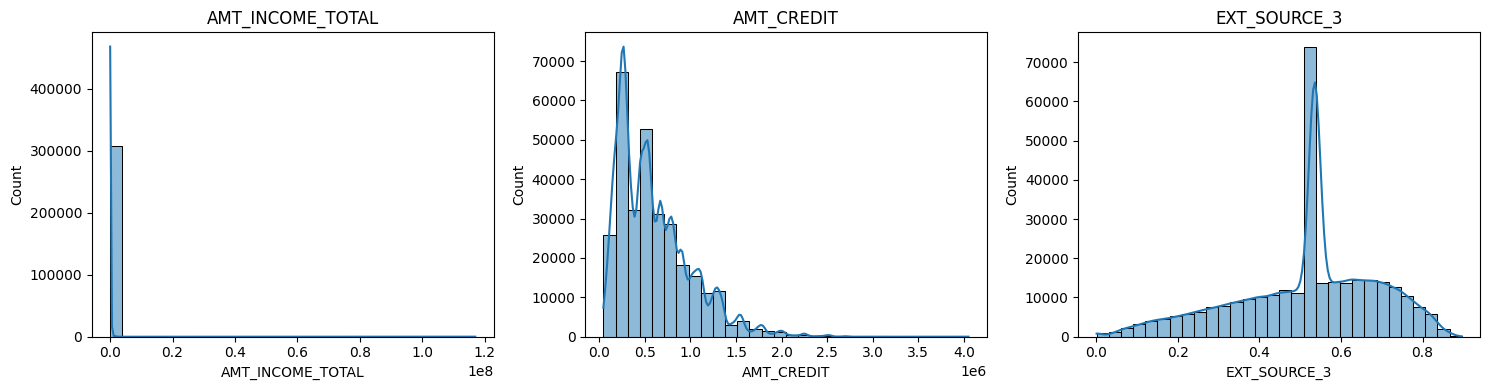

In [97]:
key_numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE_3']

plt.figure(figsize=(15, 4))
for col in key_numeric_cols:
    plt.subplot(1,3,key_numeric_cols.index(col) + 1)
    sns.histplot(df_cur_app[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

AMT_INCOME_TOTAL and AMT_CREDIT both show strong right skew (a long tail to the right), which is typical for financial data due to a few applicants with very high incomes or credit amounts.
EXT_SOURCE_3, which is likely a normalized score, appears to have a more uniform or slightly skewed distribution.
Because of the skewness in AMT_INCOME_TOTAL and AMT_CREDIT, using the median to fill missing values is appropriate—it prevents the imputed values from being distorted by extreme outliers. For columns like EXT_SOURCE_3, the median or mean could both be reasonable, but the median remains a safe, robust choice.

Impute numeric columns with median

In [82]:
for col in num_cols:
  if df_cur_app[col].isnull().sum() > 0:
    df_cur_app[col].fillna(df_cur_app[col].median(), inplace=True)


<ipython-input-82-28ce6bbbbbea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cur_app[col].fillna(df_cur_app[col].median(), inplace=True)


Impute categorical columns with mode

In [83]:
for col in cat_cols:
  if df_cur_app[col].isnull().sum() > 0:
    df_cur_app[col].fillna(df_cur_app[col].mode()[0], inplace=True)

<ipython-input-83-d2376cc8f28c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cur_app[col].fillna(df_cur_app[col].mode()[0], inplace=True)


Verify no missing values remain

In [91]:
print(f'Remaining missing values: {df_cur_app.isnull().sum().sum()}')

Remaining missing values: 0


In [94]:
df_cur_app.shape

(307511, 73)

In [92]:
df_cur_app.to_csv('/content/drive/MyDrive/cur_app_cleaned.csv', index=False)